# Part 7 머신러닝 데이터 분석

## 1 머신러닝 개요

### 1-1 머신러닝이란?

### 1-2 지도 학습 vs 비지도 학습

### 1-3 머신러닝 프로세스

## 2 회귀분석

### 2-1 단순회귀분석

#### step 1 - 데이터 준비

In [19]:
%cd /content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data

/content/drive/MyDrive/AI/Bart/파이썬 머신러닝 판다스 데이터 분석/data


In [4]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('auto-mpg.csv' , header = None)

# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# 데이터 살펴보기
print(df.head())
print('\n')

# IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns' , 10)
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

#### Step 2 - 데이터 탐색

In [6]:
# 데이터 자료형 확인
print(df.info())
print('\n')

# 데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [7]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)
print(df['horsepower'].unique())
print('\n')

df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

print(df.describe())

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

룰루~

#### Step 3 - 속성 선택

In [8]:
# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


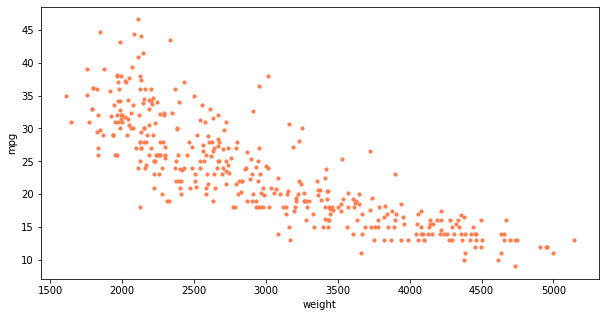

In [9]:
### 종속 변수 Y인 "연비 (mpg) "와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind = 'scatter' , x = 'weight' , y = 'mpg' , c = 'coral' , s =10  , figsize=(10 , 5))
plt.show()
plt.close()

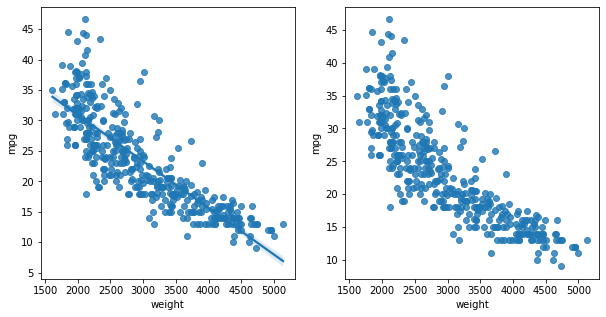

In [10]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize = (10 , 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x = 'weight' , y = 'mpg' , data = ndf , ax = ax1)
sns.regplot(x = 'weight' , y = 'mpg' , data = ndf , ax = ax2 , fit_reg=False)
plt.show()
plt.close()

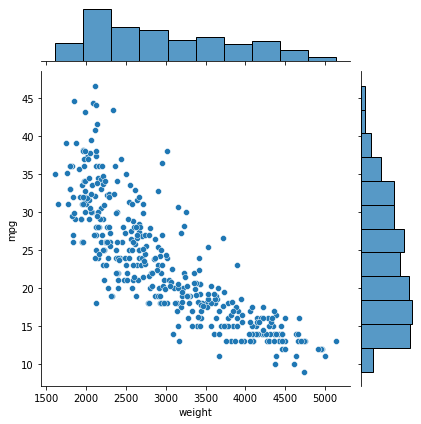

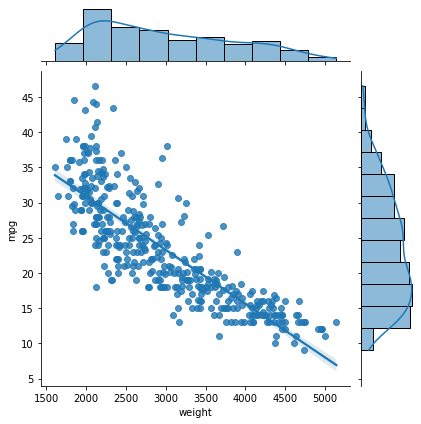

In [11]:
# seaborn 조인트 그래프 = 산점도, 히스토그램
sns.jointplot(x = 'weight' , y = 'mpg' , data = ndf)
sns.jointplot(x = 'weight' , y = 'mpg' , kind='reg' , data = ndf)
plt.show()
plt.close()

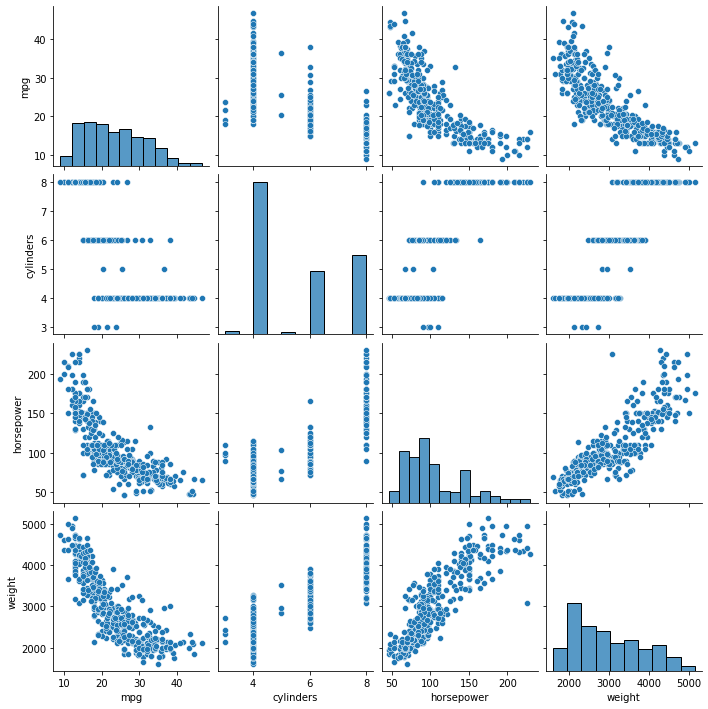

In [13]:
# seaborn pariplot으로 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

#### Step 4 - 훈련/검증 데이터 분할

In [14]:
# 속성(변수) 선택
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size = 0.3,
                                                       random_state = 10)
print('train data 개수: ' , len(X_train))
print('test data 개수: ' , len(X_test))

train data 개수:  274
test data 개수:  118


#### Step 5 - 모형 학습 및 검증

In [15]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수 (R-제곱) 계산
r_square = lr.score(X_test , y_test)
print(r_square)

0.6822458558299322


In [16]:
#회귀식의 기울기 
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b' , lr.intercept_)

기울기 a:  [-0.00775343]


y절편 b 46.7103662572801


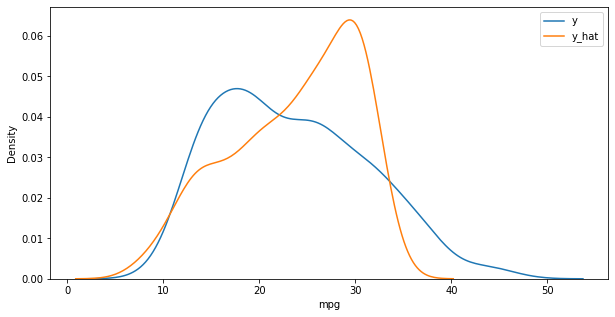

In [18]:
# 모형에 존체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10 , 5))
ax1 = sns.kdeplot(y , label = "y")
ax2 = sns.kdeplot(y_hat , label = "y_hat" , ax=  ax1)
plt.legend()
plt.show()

### 2-2 다항회귀분석

#### 데이터 준비

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv' , header = None)
# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]

# ndf 데이터를 train data와 test data로 구분 (7:3 비율)
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


#### 모형 학습 및 검증

In [22]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 다항식 변환
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ' , X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [23]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975481


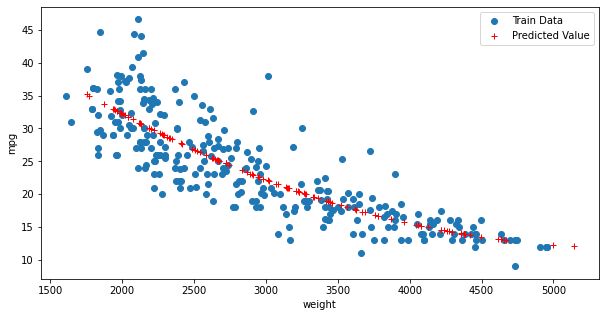

In [24]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train , y_train , 'o'  ,label = 'Train Data')
ax.plot(X_test , y_hat_test , 'r+' , label = 'Predicted Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

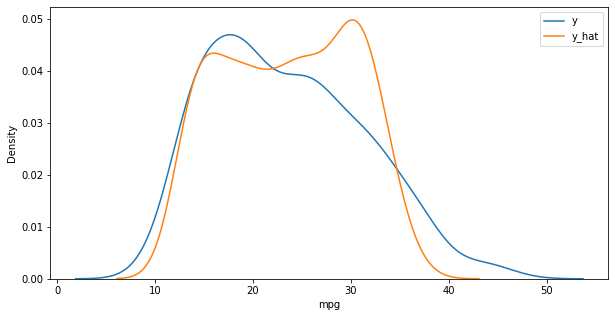

In [25]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10 , 5))
ax1 = sns.kdeplot(y , label = "y")
ax2 = sns.kdeplot(y_hat , label = "y_hat"  , ax = ax1)
plt.legend()
plt.show()

### 2-3 다중회귀분석

#### 데이터 준비

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv' , header = None)
# 열 이름 지정
df.columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower' , 'weight',
              'acceleration' , 'model year' , 'origin' , 'name']

# horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?' , np.nan , inplace = True)
df.dropna(subset = ['horsepower'] , axis = 0 , inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

# 분석에 활용할 열(속성) 선택(연비 , 실린더 , 출력, 중량)
ndf = df[['mpg' , 'cylinders' , 'horsepower' , 'weight']]

# ndf 데이터를 train data와 test data로 구분 (7:3 비율)
X = ndf[['weight']]
y = ndf['mpg']

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

#### 모형 학습 및 검증

In [26]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순 회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train , y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test , y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ' , lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)

0.6822458558299322


X 변수의 계수 a:  [-0.00775343]


상수항 b 46.7103662572801
